In [9]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")
sys.path.append("../../Env/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

In [1]:
import fermipy

In [2]:
fermipy

<module 'fermipy' from '/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/fermipy/__init__.py'>

In [22]:
lat_catalog = FermiLATSourceCatalog()

ra, dec, table = lat_catalog.search_around_source("Crab", radius=20.0)

display(table)
model = lat_catalog.get_model()
model.free_point_sources_within_radius(3.0, normalization_only=True)
model.display()

Trying https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermilpsc&


name,source_type,short_source_type,ra,dec,assoc_name,tevcat_assoc,Search_Offset
,,,deg,deg,,,
object,str52,object,float64,float64,object,object,float64
4FGL J0534.5+2201s,pulsar wind nebula,PWN,83.6331,22.0199,Crab Nebula,Crab,0.3965
4FGL J0534.5+2201i,pulsar wind nebula,PWN,83.6330,22.0200,Crab Nebula,Crab,0.3979
4FGL J0534.5+2200,"pulsar, identified by pulsations",PSR,83.6367,22.0149,PSR J0534+2200,Crab pulsar,0.4447
4FGL J0526.3+2246,active galaxy of uncertain type,bcu,81.5908,22.7778,NVSS J052622+224801,,121.9694
4FGL J0544.4+2238,unknown,,86.1093,22.6418,,,142.7227
4FGL J0521.7+2112,BL Lac type of blazar,bll,80.4445,21.2131,TXS 0518+211,VER J0521+211,184.0105
4FGL J0528.3+1817,unknown,unk,82.0946,18.2943,1RXS J052829.6+181657,,239.3570
4FGL J0519.7+1939,unknown,,79.9457,19.6646,,,250.0485


Model summary:
==============

                    N
Point sources     196
Extended sources    0
Particle sources    0

Free parameters (5):
--------------------

                                        value min_value max_value   
Crab_synch.spectrum.main.Log_parabola.K   0.0       0.0       0.0  \
Crab_IC.spectrum.main.Log_parabola.K      0.0       0.0       0.0   
PSR_J0534p2200...K                        0.0       0.0       0.0   
NVSS_J052622p224801...K                   0.0       0.0       0.0   
x4FGL_J0544d4p2238...K                    0.0       0.0       0.0   

                                                   unit  
Crab_synch.spectrum.main.Log_parabola.K  keV-1 s-1 cm-2  
Crab_IC.spectrum.main.Log_parabola.K     keV-1 s-1 cm-2  
PSR_J0534p2200...K                       keV-1 s-1 cm-2  
NVSS_J052622p224801...K                  keV-1 s-1 cm-2  
x4FGL_J0544d4p2238...K                   keV-1 s-1 cm-2  

Fixed parameters (1089):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [23]:
# model["Crab_IC.spectrum.main.Log_parabola.K"].fix = True
# model.Crab_synch.spectrum.main.Log_parabola.K.fix = True
model.PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index.free = True
model.display()

Model summary:
==============

                    N
Point sources     196
Extended sources    0
Particle sources    0

Free parameters (6):
--------------------

                                            value min_value max_value   
Crab_synch.spectrum.main.Log_parabola.K       0.0       0.0       0.0  \
Crab_IC.spectrum.main.Log_parabola.K          0.0       0.0       0.0   
PSR_J0534p2200...K                            0.0       0.0       0.0   
PSR_J0534p2200...index                  -1.826553     -10.0      10.0   
NVSS_J052622p224801...K                       0.0       0.0       0.0   
x4FGL_J0544d4p2238...K                        0.0       0.0       0.0   

                                                   unit  
Crab_synch.spectrum.main.Log_parabola.K  keV-1 s-1 cm-2  
Crab_IC.spectrum.main.Log_parabola.K     keV-1 s-1 cm-2  
PSR_J0534p2200...K                       keV-1 s-1 cm-2  
PSR_J0534p2200...index                                   
NVSS_J052622p224801...K                  keV-1 s-1 cm-2  
x4FGL_J0544d4p2238...K                   keV-1 s-1 cm-2  

Fixed parameters (1088):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [13]:
tstart = "2010-01-01 00:00:00"
tstop = "2024-01-25 00:00:00"

# Note that this will understand if you already download these files, and will
# not do it twice unless you change your selection or the outdir

evfile, scfile = download_LAT_data(
    ra,
    dec,
    20.0,
    tstart,
    tstop,
    time_type="Gregorian",
    destination_directory="../../data/Fermidata/Crab/",
)

20:53:32 INFO      Query parameters:                                                       ]8;id=548011;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=129596;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 83.6287,22.0147                        ]8;id=122707;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=102715;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=149813;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=387178;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 20.0                                   ]8;id=530164;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=225791;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 2010-01-01 00:00:00,2024-01-25         ]8;id=789283;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=575497;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\
                  00:00:00                                                                                         

         INFO                            timetype = Gregorian                              ]8;id=552624;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=619288;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 30.000,1000000.000                     ]8;id=198480;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=127513;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO              photonOrExtendedOrNone = Photon                                 ]8;id=339274;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=286407;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=825301;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=57856;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=285656;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=280251;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: 1482404e8c5dc25d6bcf4c2b9df033c7                              ]8;id=448381;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=846826;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

In [17]:
config = FermipyLike.get_basic_config(
    evfile=evfile,
    scfile=scfile,
    ra=ra,
    dec=dec,
    fermipy_verbosity=1,
    fermitools_chatter=1,
)

# See what we just got

config["selection"]["emax"] = 300000.0
config["selection"]["zmax"] = 90
config["gtlike"] = {"edisp": True}
config["gtlike"]["irfs"] = "P8R3_SOURCE_V3"
config["gtlike"]["edisp_disable"] = ['isodiff','galdiff']
config["model"] = {}
config["model"]["src_roiwidth"] = 15.0
config["model"]["galdiff"] = '$FERMI_DIFFUSE_DIR/gll_iem_v07.fits'
config["model"]["isodiff"] = 'iso_P8R3_SOURCE_V3_v1.txt'
LAT = FermipyLike("LAT", config)
data = DataList(LAT)
config["fileio"]["outdir"]="../res/Fermi_Crab/"
config.display()

binning:
  binsperdec: 8
  binsz: 0.1
  roiwidth: 10.0
data:
  evfile: /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/Fermidata/Crab/L1482404e8c5dc25d6bcf4c2b9df033c7_FT1.fits
  scfile: /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/Fermidata/Crab/L2401250417527EA9682C20_SC00.fits
fileio:
  outdir: ../res/Fermi_Crab/
gtlike:
  edisp: true
  edisp_disable:
  - isodiff
  - galdiff
  irfs: P8R3_SOURCE_V3
logging:
  chatter: 1
  verbosity: 1
selection:
  dec: 22.0146947868738
  emax: 300000.0
  emin: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.62870762486367
  tmax: 727833605.0
  tmin: 283996802.0
  zmax: 90



binning:
 binsperdec: 8
 binsz: 0.1
 roiwidth: 10.0
data:
 evfile: /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/Fermidata/Crab/L1482404e8c5dc25d6bcf4c2b9df033c7_FT1.fits
 scfile: /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/Fermidata/Crab/L2401250417527EA9682C20_SC00.fits
fileio:
 outdir: ../res/Fermi_Crab/
gtlike:
 edisp: true
 edisp_disable:
 - isodiff
 - galdiff
 irfs: P8R3_SOURCE_V3
logging:
 chatter: 1
 verbosity: 1
selection:
 dec: 22.0146947868738
 emax: 300000.0
 emin: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.62870762486367
 tmax: 727833605.0
 tmin: 283996802.0
 zmax: 90

In [ ]:
jl = JointLikelihood(model, data)

In [ ]:
jl.set_minimizer("minuit")

res = jl.fit()
res = jl.get_errors()
LAT.gta.write_roi('test_result',make_plots=True)

         INFO      set the minimizer to MINUIT                                             ]8;id=758617;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=99047;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1062\1062]8;;\

Best fit values:

,result,unit
parameter,,
PSR_J0534p2200...K,(1.71 +/- 0.06) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200...index,-1.823 +/- 0.030,
NVSS_J052622p224801.spectrum.main.Powerlaw.K,(1.2 -0.6 +1.0) x 10^-16,1 / (cm2 keV s)
x4FGL_J0544d4p2238.spectrum.main.Powerlaw.K,(4.1 -1.3 +1.9) x 10^-14,1 / (cm2 keV s)
LAT_isodiff_Normalization,(3 +/- 5) x 10^-1,
LAT_galdiff_Prefactor,(9.81 +/- 0.16) x 10^-1,


Correlation matrix:

1.00,0.70,-0.04,0.07,0.12,-0.16
0.70,1.00,0.11,0.31,0.32,-0.26
-0.04,0.11,1.00,0.11,-0.08,-0.02
0.07,0.31,0.11,1.00,-0.12,-0.03
0.12,0.32,-0.08,-0.12,1.00,-0.87
-0.16,-0.26,-0.02,-0.03,-0.87,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
LAT,118074.561129
total,118074.561129


Values of statistical measures:

,statistical measures
AIC,236161.122558
BIC,236224.377527


In [15]:
res = jl.get_contours(
    model.PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index, -2.0, -1.6, 30
)

Profiling likelihood:   0%|          | 0/30 [00:00<?, ?it/s]

01:07:58 ERROR     Last status:                                                             ]8;id=177983;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=259348;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#166\166]8;;\

         ERROR     ┌─────────────────────────────────────────────────────────────────────── ]8;id=414637;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=100008;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  ──┐                                                                                              

         ERROR     │                                Migrad                                  ]8;id=439482;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=895339;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  │                                                                                                

         ERROR     ├──────────────────────────────────┬──────────────────────────────────── ]8;id=95514;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=251230;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  ──┤                                                                                              

         ERROR     │ FCN = 1.181e+05                  │             Nfcn = 2077             ]8;id=149849;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=157905;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  │                                                                                                

         ERROR     │ EDM = 0.0238 (Goal: 0.0001)      │                                     ]8;id=595620;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=83621;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  │                                                                                                

         ERROR     ├──────────────────────────────────┼──────────────────────────────────── ]8;id=594284;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=734580;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  ──┤                                                                                              

         ERROR     │         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)   ]8;id=68110;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=146825;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  │                                                                                                

         ERROR     ├──────────────────────────────────┼──────────────────────────────────── ]8;id=982655;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=933038;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  ──┤                                                                                              

         ERROR     │      No parameters at limit      │           Below call limit          ]8;id=859609;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=122934;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  │                                                                                                

         ERROR     ├──────────────────────────────────┼──────────────────────────────────── ]8;id=194173;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=199808;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  ──┤                                                                                              

         ERROR     │             Hesse ok             │         Covariance accurate         ]8;id=165394;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=480017;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  │                                                                                                

         ERROR     └──────────────────────────────────┴──────────────────────────────────── ]8;id=369120;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=185353;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#169\169]8;;\
                  ──┘                                                                                              

         ERROR     ┌───┬──────────────────────────────────────────────────────┬───────────┬ ]8;id=462135;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=565003;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  ───────────┬────────────┬────────────┬─────────┬─────────┬───────┐                               

         ERROR     │   │ Name                                                 │   Value   │ ]8;id=5417;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=881634;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │                                

         ERROR     ├───┼──────────────────────────────────────────────────────┼───────────┼ ]8;id=621340;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=326860;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  ───────────┼────────────┼────────────┼─────────┼─────────┼───────┤                               

         ERROR     │ 0 │ PSR_J0534p2200_spectrum_main_Super_cutoff_powerlaw_K │ 0.16e-12  │ ]8;id=122228;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=567018;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  0.21e-12  │            │            │2.60526e-16│2.60526e-10│       │                            

         ERROR     │ 1 │ NVSS_J052622p224801_spectrum_main_Powerlaw_K         │   -16.0   │ ]8;id=20078;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=290433;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  2.3    │            │            │-19.8003 │-13.8003 │       │                                   

         ERROR     │ 2 │ x4FGL_J0544d4p2238_spectrum_main_Powerlaw_K          │   -13.5   │ ]8;id=993715;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=68473;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  2.4    │            │            │ -16.852 │ -10.852 │       │                                   

         ERROR     │ 3 │ LAT_isodiff_Normalization                            │   -0.9    │ ]8;id=900405;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=293069;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  1.8    │            │            │   -3    │    3    │       │                                   

         ERROR     │ 4 │ LAT_galdiff_Prefactor                                │   -0.0    │ ]8;id=368;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=633680;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  0.8    │            │            │   -1    │    1    │       │                                   

         ERROR     └───┴──────────────────────────────────────────────────────┴───────────┴ ]8;id=65932;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py\minuit_minimizer.py]8;;\:]8;id=563957;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/minimizer/minuit_minimizer.py#174\174]8;;\
                  ───────────┴────────────┴────────────┴─────────┴─────────┴───────┘                               

FitFailed: MIGRAD call failed. This is usually due to unconstrained parameters.

In [ ]:
res = jl.get_contours(
    "PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.K",
    1.6e-13,
    2.2e-13,
    20,
    "PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index",
    -2.0,
    -1.7,
    20,
)

In [15]:
gta = LAT.gta
# Dictionary defining the spatial/spectral parameters of the test source
modelts = {'SpatialModel' : 'PointSource', 'Index' : 2.0,
         'SpectrumType' : 'PowerLaw'}

# Both methods return a dictionary with the maps
m0 = gta.residmap('fit_model', model=modelts, make_plots=True)
m1 = gta.tsmap('fit_model', model=modelts, make_plots=True)

In [35]:
gta.sed('PSR_J0534p2200', make_plots=True)

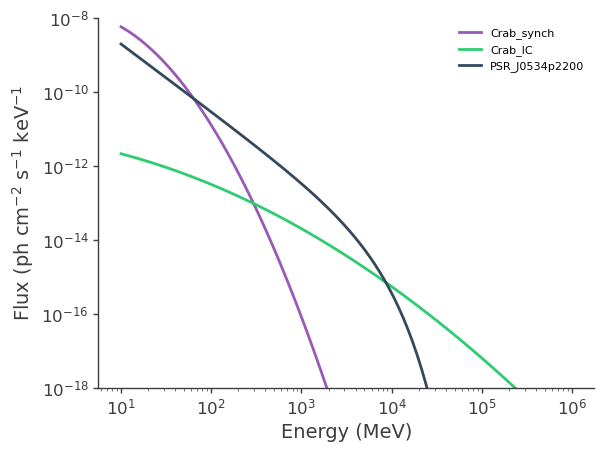

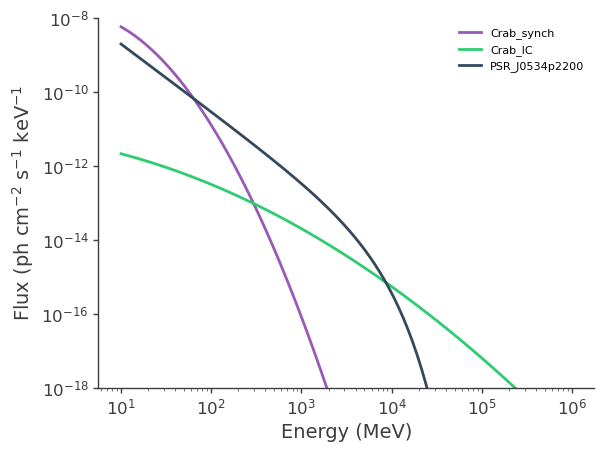

In [29]:
%matplotlib inline
energies = np.logspace(1, 6, 100) * u.MeV
fig, ax = plt.subplots()
# we only want to visualize the relevant sources...
src_to_plot = ["Crab", "PSR_J0534p2200"]
# Now loop over all point sources and plot them
for source_name, point_source in model.point_sources.items():
    for src in src_to_plot:
        if src in source_name:
            # Plot the sum of all components for this source

            ax.loglog(energies, point_source(energies), label=source_name)
            # If there is more than one component, plot them also separately

            if len(point_source.components) > 1:

                for component_name, component in point_source.components.items():
                    ax.loglog(
                        energies,
                        component.shape(energies),
                        "--",
                        label=f"{component_name} of {source_name}",
                    )

# Add a legend
ax.legend(loc=0, frameon=False)

ax.set_xlabel("Energy (MeV)")
ax.set_ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$")
ax.set_ylim([1e-18, 1e-8])

# show the plot
fig

In [24]:
model = my.model2bayes(model)

In [26]:
# It's better to remove the output directory,...
# shutil.rmtree(fermipy_output_directory)

bayes = BayesianAnalysis(model, data)

21:44:55 INFO      Using IRFs P8R3_SOURCE_V3                                                     ]8;id=963479;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/FermipyLike.py\FermipyLike.py]8;;\:]8;id=956897;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/plugins/FermipyLike.py#126\126]8;;\


Found Galactic template for IRF. P8R3_SOURCE_V3: /data/home/cwy/.mylib/miniconda3/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 


Found Isotropic template for irf P8R3_SOURCE_V3: /data/home/cwy/.mylib/miniconda3/envs/fermi/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_SOURCE_V3_v1.txt


In [27]:
bayes.set_sampler("emcee")

n_walkers = 30
burn_in = 50
n_samples = 200

bayes.sampler.setup(n_iterations=n_samples, n_burn_in=burn_in, n_walkers=n_walkers)

res = bayes.sample()

11:25:44 INFO      sampler set to emcee                                                    ]8;id=470193;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=140224;file:///data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

emcee: Exception while calling your likelihood function:
  params: [ 1.25689941e-10  5.21166712e-16  2.18591730e-13 -1.71594776e+00
  1.46063624e-17  1.59881149e-14  1.02670163e+00  1.06015846e+00]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/data/home/cwy/.mylib/miniconda3/envs/fermi/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py", line 328, in get_posterior
    prior_value = parameter.prior(trial_values[i])
TypeError: 'NoneType' object is not callable


TypeError: 'NoneType' object is not callable

In [ ]:
this_K = bayes.results.get_variates(
    "PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.K"
)
this_idx = bayes.results.get_variates(
    "PSR_J0534p2200.spectrum.main.Super_cutoff_powerlaw.index"
)

print("Highest_posterior_density_intervals :")
print(
    "K (68%%):     %10.2e,%10.2e" % this_K.highest_posterior_density_interval(cl=0.68)
)
print(
    "K (95%%):     %10.2e,%10.2e" % this_K.highest_posterior_density_interval(cl=0.95)
)
print(
    "Index (68%%): %10.2e,%10.2e" % this_idx.highest_posterior_density_interval(cl=0.68)
)
print(
    "Index (95%%): %10.2e,%10.2e" % this_idx.highest_posterior_density_interval(cl=0.95)
)

Highest_posterior_density_intervals :
K (68%):       1.55e-13,  1.68e-13
K (95%):       1.49e-13,  1.73e-13
Index (68%):  -1.91e+00, -1.85e+00
Index (95%):  -1.93e+00, -1.82e+00


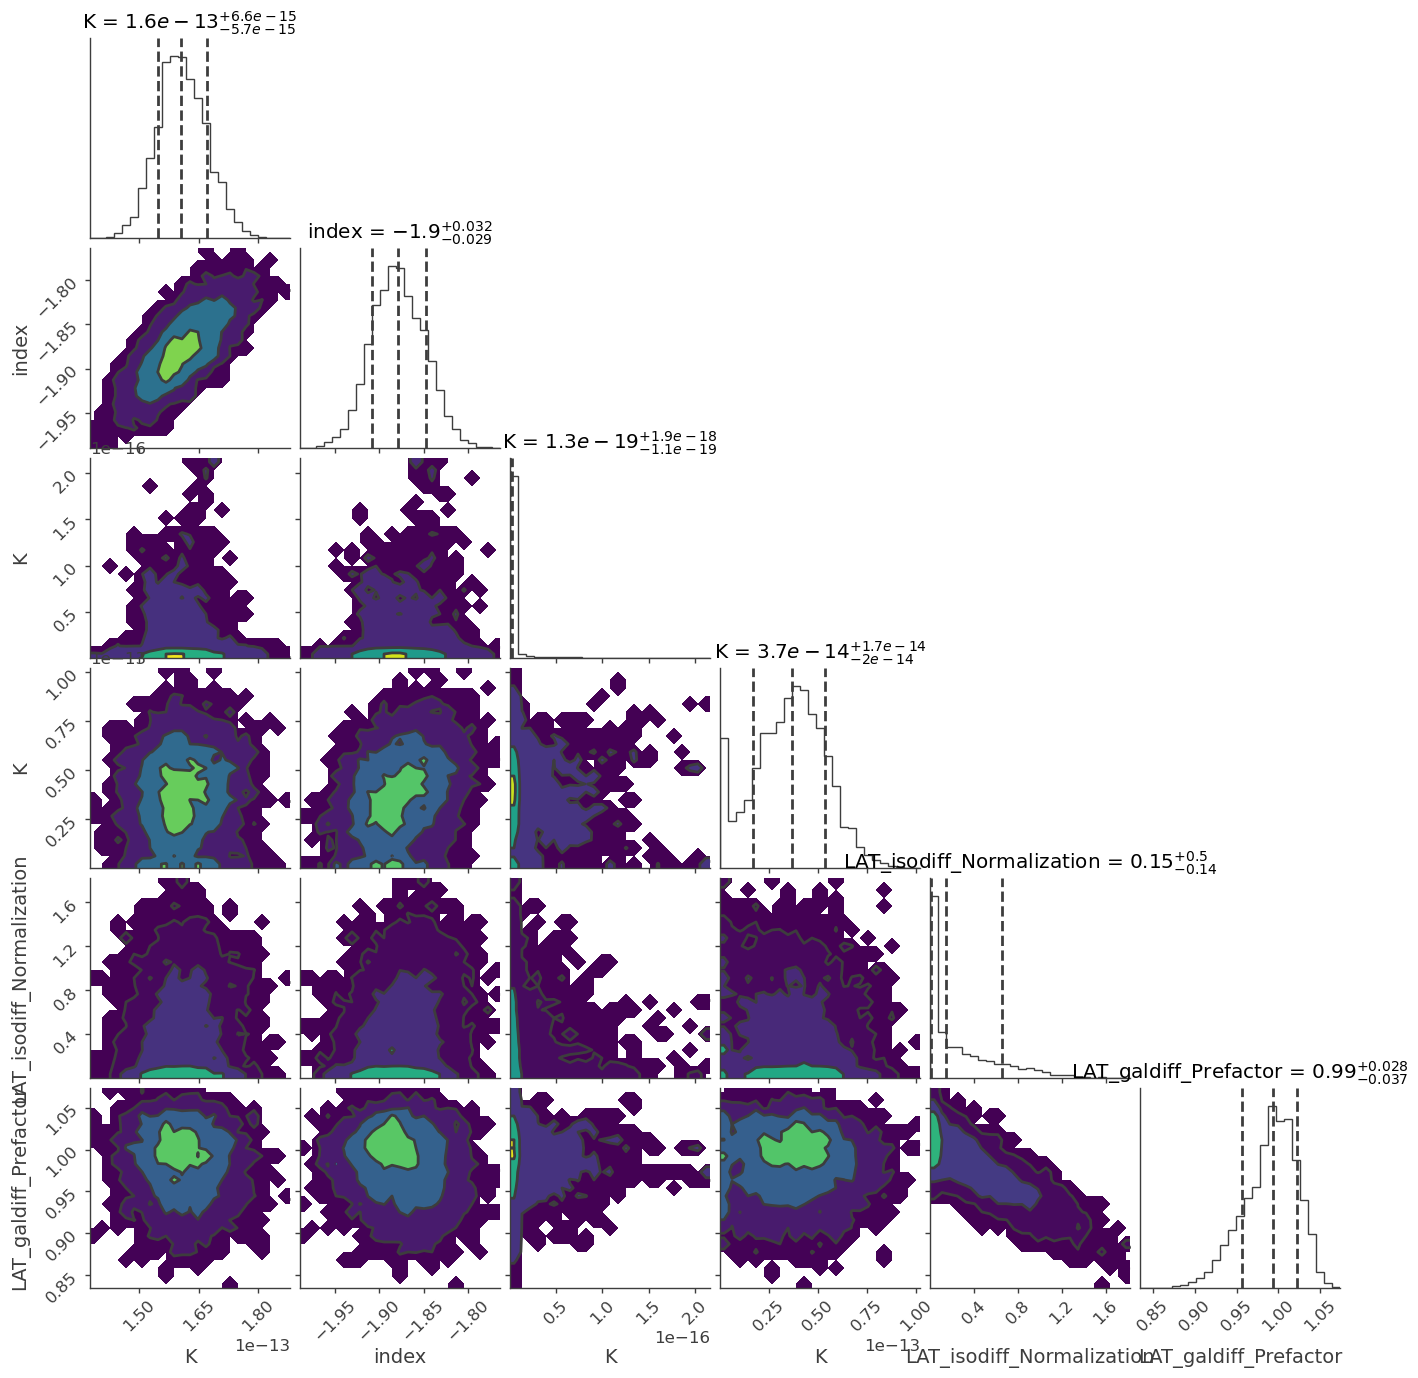

In [ ]:
corner_figure = bayes.results.corner_plot()
corner_figure